## Classic and Sequential A/B Testing analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [2]:
#load data
data = pd.read_csv("../../data/AdSmartABdata.csv",delimiter = ',')


In [3]:
#Overview of data
data.head()
data.tail()
data.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8009,fd485e19-fb47-4223-8dc2-7bae945c08fa,control,2020-07-08,19,iPhone,5,Mobile Safari,0,0
220,06ad16bb-92cd-4116-9b45-5210e68afceb,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
1763,3a721162-e67c-4cd6-a683-9346109c4d4f,control,2020-07-10,6,Generic Smartphone,6,Chrome Mobile,1,0
3494,70c48e99-1ae8-4377-8f68-9e19f4c348bb,exposed,2020-07-08,16,Samsung SM-A202F,6,Samsung Internet,0,0
869,1c360b0c-6188-4d94-8b94-26e349f29c7d,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
2153,46b711e3-9bc3-4b48-a4cd-cfb779d0ea8c,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
6004,be8b07ec-d125-4a6f-9af7-8062026cc6c2,control,2020-07-03,15,Samsung SM-G920F,6,Chrome Mobile WebView,0,1
2445,4f780fcc-e114-418a-9ef3-d6aee4c47c26,control,2020-07-08,8,Generic Smartphone,6,Chrome Mobile,0,0
504,0f18f11f-57db-408a-8c8e-bfffac16a21f,control,2020-07-03,15,MAR-LX1A,6,Facebook,0,0
6870,da3ba008-7f93-4673-87f3-ab52e3364eff,control,2020-07-03,15,I3312,6,Facebook,0,0


In [4]:
#variables type
print(data.dtypes)
print(data.info())
print(data.describe())

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB
None
              hour  platform_os          yes           no
count  8077.000000  8077.000000  8077.000000  8077.000000
mean     11.615080     5.947134     0.070818     0.083075


In [5]:
#Understand various summary statistics of the data
include =['object', 'float', 'int'] 
data.describe(include=include)
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [8]:
data.yes.value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [9]:
data.no.value_counts()

0    7406
1     671
Name: no, dtype: int64

<AxesSubplot:>

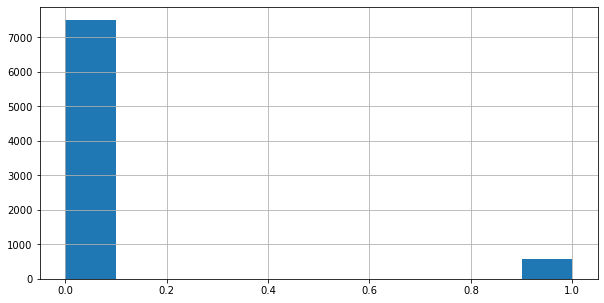

In [10]:
data.yes.hist(figsize=(10,5))

### Plot above Shows histogram of yes 

In [13]:
data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Handling Missing Values

In [14]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(" dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

 dataset contains 0.0 % missing values.


### Distribution

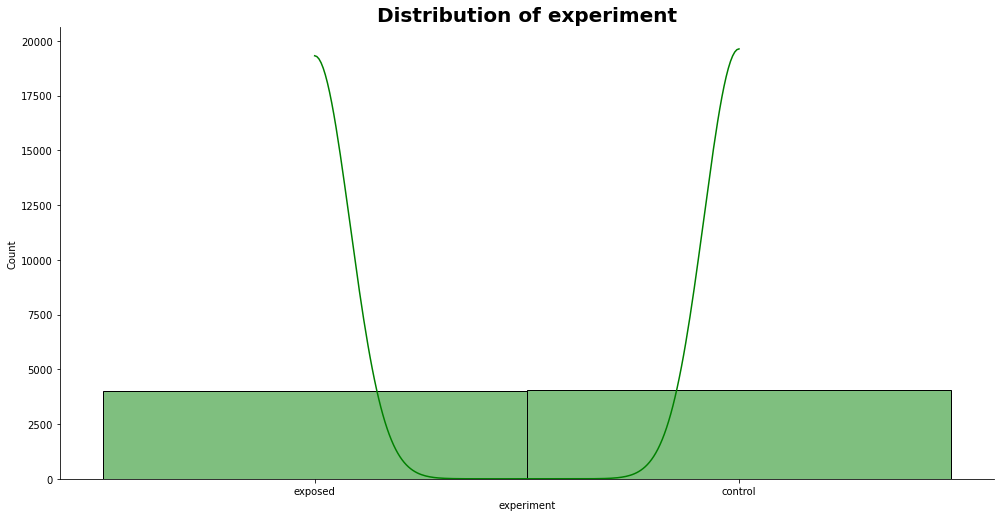

In [17]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
plot_hist(data,"experiment","green")

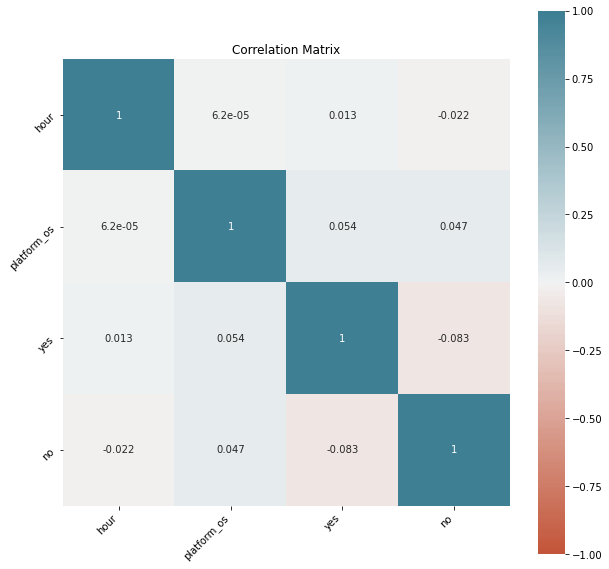

In [21]:
 datacopy = data.copy()

datacopy.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);